In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup

In [31]:
r = requests.get('https://www.hockey-reference.com/').text
tables = pd.read_html(r, header=0)
tables[0]

,Eastern,W,L,OL,PTS,RW,RgRec,RgPt%
0,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic
1,BOS*,65,12,5,135,54,54-12-16,.756
2,TOR*,50,21,11,111,42,42-21-19,.628
3,TBL*,46,30,6,98,38,38-30-14,.549
4,FLA*,42,32,8,92,36,36-32-14,.524
5,BUF,42,33,7,91,30,30-33-19,.482
6,OTT,39,35,8,86,31,31-35-16,.476
7,DET,35,37,10,80,28,28-37-17,.445
8,MTL,31,45,6,68,21,21-45-16,.354
9,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan


In [39]:
# Split Atlantic and Metropolitan tables up
Atlantic = tables[0][1:9].reset_index(drop = True)
Atlantic.rename(columns={'Eastern': 'Team'}, inplace=True)
Atlantic

,Team,W,L,OL,PTS,RW,RgRec,RgPt%
0,BOS*,65,12,5,135,54,54-12-16,.756
1,TOR*,50,21,11,111,42,42-21-19,.628
2,TBL*,46,30,6,98,38,38-30-14,.549
3,FLA*,42,32,8,92,36,36-32-14,.524
4,BUF,42,33,7,91,30,30-33-19,.482
5,OTT,39,35,8,86,31,31-35-16,.476
6,DET,35,37,10,80,28,28-37-17,.445
7,MTL,31,45,6,68,21,21-45-16,.354


In [40]:
Metropolitan = tables[0][10:].reset_index(drop = True)
Metropolitan.rename(columns={'Eastern': 'Team'}, inplace=True)
Metropolitan

,Team,W,L,OL,PTS,RW,RgRec,RgPt%
0,CAR*,52,21,9,113,39,39-21-22,.610
1,NJD*,52,22,8,112,39,39-22-21,.604
2,NYR*,47,22,13,107,37,37-22-23,.591
3,NYI*,42,31,9,93,36,36-31-15,.530
4,PIT,40,31,11,91,31,31-31-20,.500
5,WSH,35,37,10,80,27,27-37-18,.439
6,PHI,31,38,13,75,26,26-38-18,.427
7,CBJ,25,48,9,59,15,15-48-19,.299


Text(0.5, 1.0, 'Points Scored by Atlantic Teams')

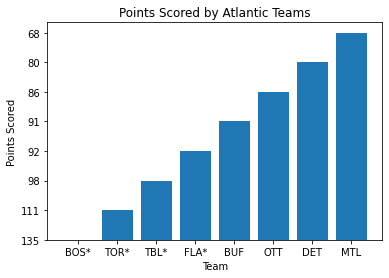

In [49]:
plt.bar(Atlantic.Team, Atlantic.PTS, bottom=0)
plt.xlabel('Team')
plt.ylabel('Points Scored')
plt.title('Points Scored by Atlantic Teams')

In [50]:
Atlantic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    8 non-null      object
 1   W       8 non-null      object
 2   L       8 non-null      object
 3   OL      8 non-null      object
 4   PTS     8 non-null      object
 5   RW      8 non-null      object
 6   RgRec   8 non-null      object
 7   RgPt%   8 non-null      object
dtypes: object(8)
memory usage: 640.0+ bytes


In [51]:
# Converting object classes to integers and then the percentage column to a floating point value
columns_to_convert = ['W', 'L', 'OL', 'PTS', 'RW']
Atlantic[columns_to_convert] = Atlantic[columns_to_convert].astype(int)

Metropolitan[columns_to_convert] = Metropolitan[columns_to_convert].astype(int)

Atlantic['RgPt%'] = Atlantic['RgPt%'].astype(float)
Metropolitan['RgPt%'] = Metropolitan['RgPt%'].astype(float)

In [52]:
print(Atlantic.info())
print(Metropolitan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    8 non-null      object 
 1   W       8 non-null      int64  
 2   L       8 non-null      int64  
 3   OL      8 non-null      int64  
 4   PTS     8 non-null      int64  
 5   RW      8 non-null      int64  
 6   RgRec   8 non-null      object 
 7   RgPt%   8 non-null      float64
dtypes: float64(1), int64(5), object(2)
memory usage: 640.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    8 non-null      object 
 1   W       8 non-null      int64  
 2   L       8 non-null      int64  
 3   OL      8 non-null      int64  
 4   PTS     8 non-null      int64  
 5   RW      8 non-null      int64  
 6   RgRec   8 non-null      object 
 7   RgPt%   8 non-null  

Text(0.5, 1.0, 'Points Scored by Atlantic Teams')

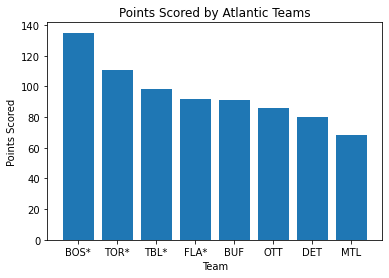

In [53]:
# Same bar chart
plt.bar(Atlantic.Team, Atlantic.PTS, bottom=0)
plt.xlabel('Team')
plt.ylabel('Points Scored')
plt.title('Points Scored by Atlantic Teams')

In [54]:
# Hockey reference - statistics
# Cap friendly - Salary data, including team salaries and caps

## 2022-2023 Free Agent Salaries

In [2]:
# Scraping salary and biographical information of 2022-2023 free agents

r = requests.get('https://www.capfriendly.com/browse/free-agents-including-signed/2023/age/all/all/ufa/asc?stats-season=2023&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats').text
tables = pd.read_html(r, header=0)
tables[0]

,PLAYER,TEAM,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,LENGTH,SIGNING,EXPIRY,EXP. YEAR,CAP HIT,CAP HIT %,SALARY,BASE SALARY,S.BONUS,P.BONUS
0,1. Johan Södergran,-,22,"Nov. 20, 1999",Sweden,205 lbs - 93 kg,"6'3"" - 191 cm",C,Left,165 - Round 6 - 2018 (LAK),...,3,ELC,UFANo QO,2022,"$791,667",1.0%,"$830,000","$750,000","$80,000",$0
1,2. Lucas Elvenes,-,22,"Aug. 18, 1999",Sweden,174 lbs - 79 kg,"6'0"" - 183 cm",RW,Left,127 - Round 5 - 2017 (VGK),...,3,ELC,UFANo QO,2022,"$776,667",1.0%,"$750,000","$750,000",$0,"$110,000"
2,3. Alexey Lipanov,-,22,"Aug. 17, 1999",Russia,165 lbs - 75 kg,"6'0"" - 183 cm",C,Left,76 - Round 3 - 2017 (TBL),...,3,ELC,UFANo QO,2022,"$747,500",1.0%,"$750,000","$750,000",$0,"$82,500"
3,4. Nicholas Henry,-,22,"Jul. 4, 1999",Canada,190 lbs - 86 kg,"6'0"" - 183 cm",RW,Right,94 - Round 4 - 2017 (COL),...,3,ELC,UFANo QO,2022,"$798,333",1.0%,"$830,000","$750,000","$80,000",$0
4,5. David Farrance,-,23,"Jun. 23, 1999",United States,189 lbs - 86 kg,"5'11"" - 180 cm",LD,Left,92 - Round 3 - 2017 (NSH),...,2,ELC,UFANo QO,2022,"$925,000",1.1%,"$925,000","$832,500","$92,500","$850,000"
5,6. Josh Brook,-,23,"Jun. 17, 1999",Canada,185 lbs - 84 kg,"6'2"" - 188 cm",RD,Right,56 - Round 2 - 2017 (MTL),...,3,ELC,UFANo QO,2022,"$795,000",1.0%,"$800,000","$800,000",$0,"$32,500"
6,7. Jordy Bellerive,-,23,"May 2, 1999",Canada,194 lbs - 88 kg,"5'10"" - 178 cm",C,Left,-,...,3,ELC,UFANo QO,2022,"$733,333",1.0%,"$750,000","$750,000",$0,$0
7,8. Alex D'Orio,-,23,"Apr. 28, 1999",Canada,198 lbs - 90 kg,"6'2"" - 188 cm",G,Right,-,...,3,ELC,UFANo QO,2022,"$733,333",1.0%,"$750,000","$750,000",$0,$0
8,9. Beck Warm,-,23,"Apr. 22, 1999",Canada,172 lbs - 78 kg,"6'0"" - 183 cm",G,Left,-,...,2,ELC,UFANo QO,2022,"$750,000",0.9%,"$775,000","$750,000","$25,000",$0
9,10. Jan Drozg,-,23,"Apr. 1, 1999",Slovenia,168 lbs - 76 kg,"6'0"" - 183 cm","LW, RW",Right,152 - Round 5 - 2017 (PIT),...,3,ELC,UFANo QO,2022,"$809,167",1.0%,"$842,500","$750,000","$92,500","$82,500"


In [3]:
url = 'https://www.capfriendly.com/browse/free-agents-including-signed/2023/age/all/all/ufa/asc?stats-season=2023&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
# find <div class="r" style="margin:0 4px 0 0">Page 2 of 32</div>
# <div class="r" style="margin:0 4px 0 0">Page 1 of 11</div>
res = soup.find('div', class_='r', style='margin:0 4px 0 0')
pc = int(res.text.split(' ')[-1])

master = []
for page in range(1,pc+1):
    url = 'https://www.capfriendly.com/browse/free-agents-including-signed/2023/age/all/all/ufa/asc?stats-season=2023&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats&pg={}'.format(page)
    table = pd.read_html(url)[0]
    master.append(table)

df = pd.concat(master)
df

,PLAYER,TEAM,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,LENGTH,SIGNING,EXPIRY,EXP. YEAR,CAP HIT,CAP HIT %,SALARY,BASE SALARY,S.BONUS,P.BONUS
0,1. Johan Södergran,-,22,"Nov. 20, 1999",Sweden,205 lbs - 93 kg,"6'3"" - 191 cm",C,Left,165 - Round 6 - 2018 (LAK),...,3,ELC,UFANo QO,2022,"$791,667",1.0%,"$830,000","$750,000","$80,000",$0
1,2. Lucas Elvenes,-,22,"Aug. 18, 1999",Sweden,174 lbs - 79 kg,"6'0"" - 183 cm",RW,Left,127 - Round 5 - 2017 (VGK),...,3,ELC,UFANo QO,2022,"$776,667",1.0%,"$750,000","$750,000",$0,"$110,000"
2,3. Alexey Lipanov,-,22,"Aug. 17, 1999",Russia,165 lbs - 75 kg,"6'0"" - 183 cm",C,Left,76 - Round 3 - 2017 (TBL),...,3,ELC,UFANo QO,2022,"$747,500",1.0%,"$750,000","$750,000",$0,"$82,500"
3,4. Nicholas Henry,-,22,"Jul. 4, 1999",Canada,190 lbs - 86 kg,"6'0"" - 183 cm",RW,Right,94 - Round 4 - 2017 (COL),...,3,ELC,UFANo QO,2022,"$798,333",1.0%,"$830,000","$750,000","$80,000",$0
4,5. David Farrance,-,23,"Jun. 23, 1999",United States,189 lbs - 86 kg,"5'11"" - 180 cm",LD,Left,92 - Round 3 - 2017 (NSH),...,2,ELC,UFANo QO,2022,"$925,000",1.1%,"$925,000","$832,500","$92,500","$850,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,502. Jason Spezza,-,39,"Jun. 13, 1983",Canada,216 lbs - 98 kg,"6'3"" - 191 cm","C, RW",Right,2 - Round 1 - 2001 (OTT),...,1,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,$0
2,503. Andy Greene,-,39,"Oct. 30, 1982",United States,190 lbs - 86 kg,"5'11"" - 180 cm",LD/RD,Left,-,...,1,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,"$250,000"
3,504. Craig Anderson,-,41,"May 21, 1981",United States,186 lbs - 84 kg,"6'2"" - 188 cm",G,Left,73 - Round 3 - 2001 (CHI),...,1,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,$0
4,505. Joe Thornton,-,42,"Jul. 2, 1979",Canada,220 lbs - 100 kg,"6'4"" - 193 cm","C, LW",Left,1 - Round 1 - 1997 (BOS),...,1,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,$0
